In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('HD_Cleveland_Data_Clean.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,N
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Y
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,Y
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,N
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
age         297 non-null int64
sex         297 non-null int64
cp          297 non-null int64
trestbps    297 non-null int64
chol        297 non-null int64
fbs         297 non-null int64
restecg     297 non-null int64
thalach     297 non-null int64
exang       297 non-null int64
oldpeak     297 non-null float64
slop        297 non-null int64
ca          297 non-null int64
thal        297 non-null int64
target      297 non-null object
dtypes: float64(1), int64(12), object(1)
memory usage: 32.6+ KB


In [5]:
df['target'].value_counts()

N    160
Y    137
Name: target, dtype: int64

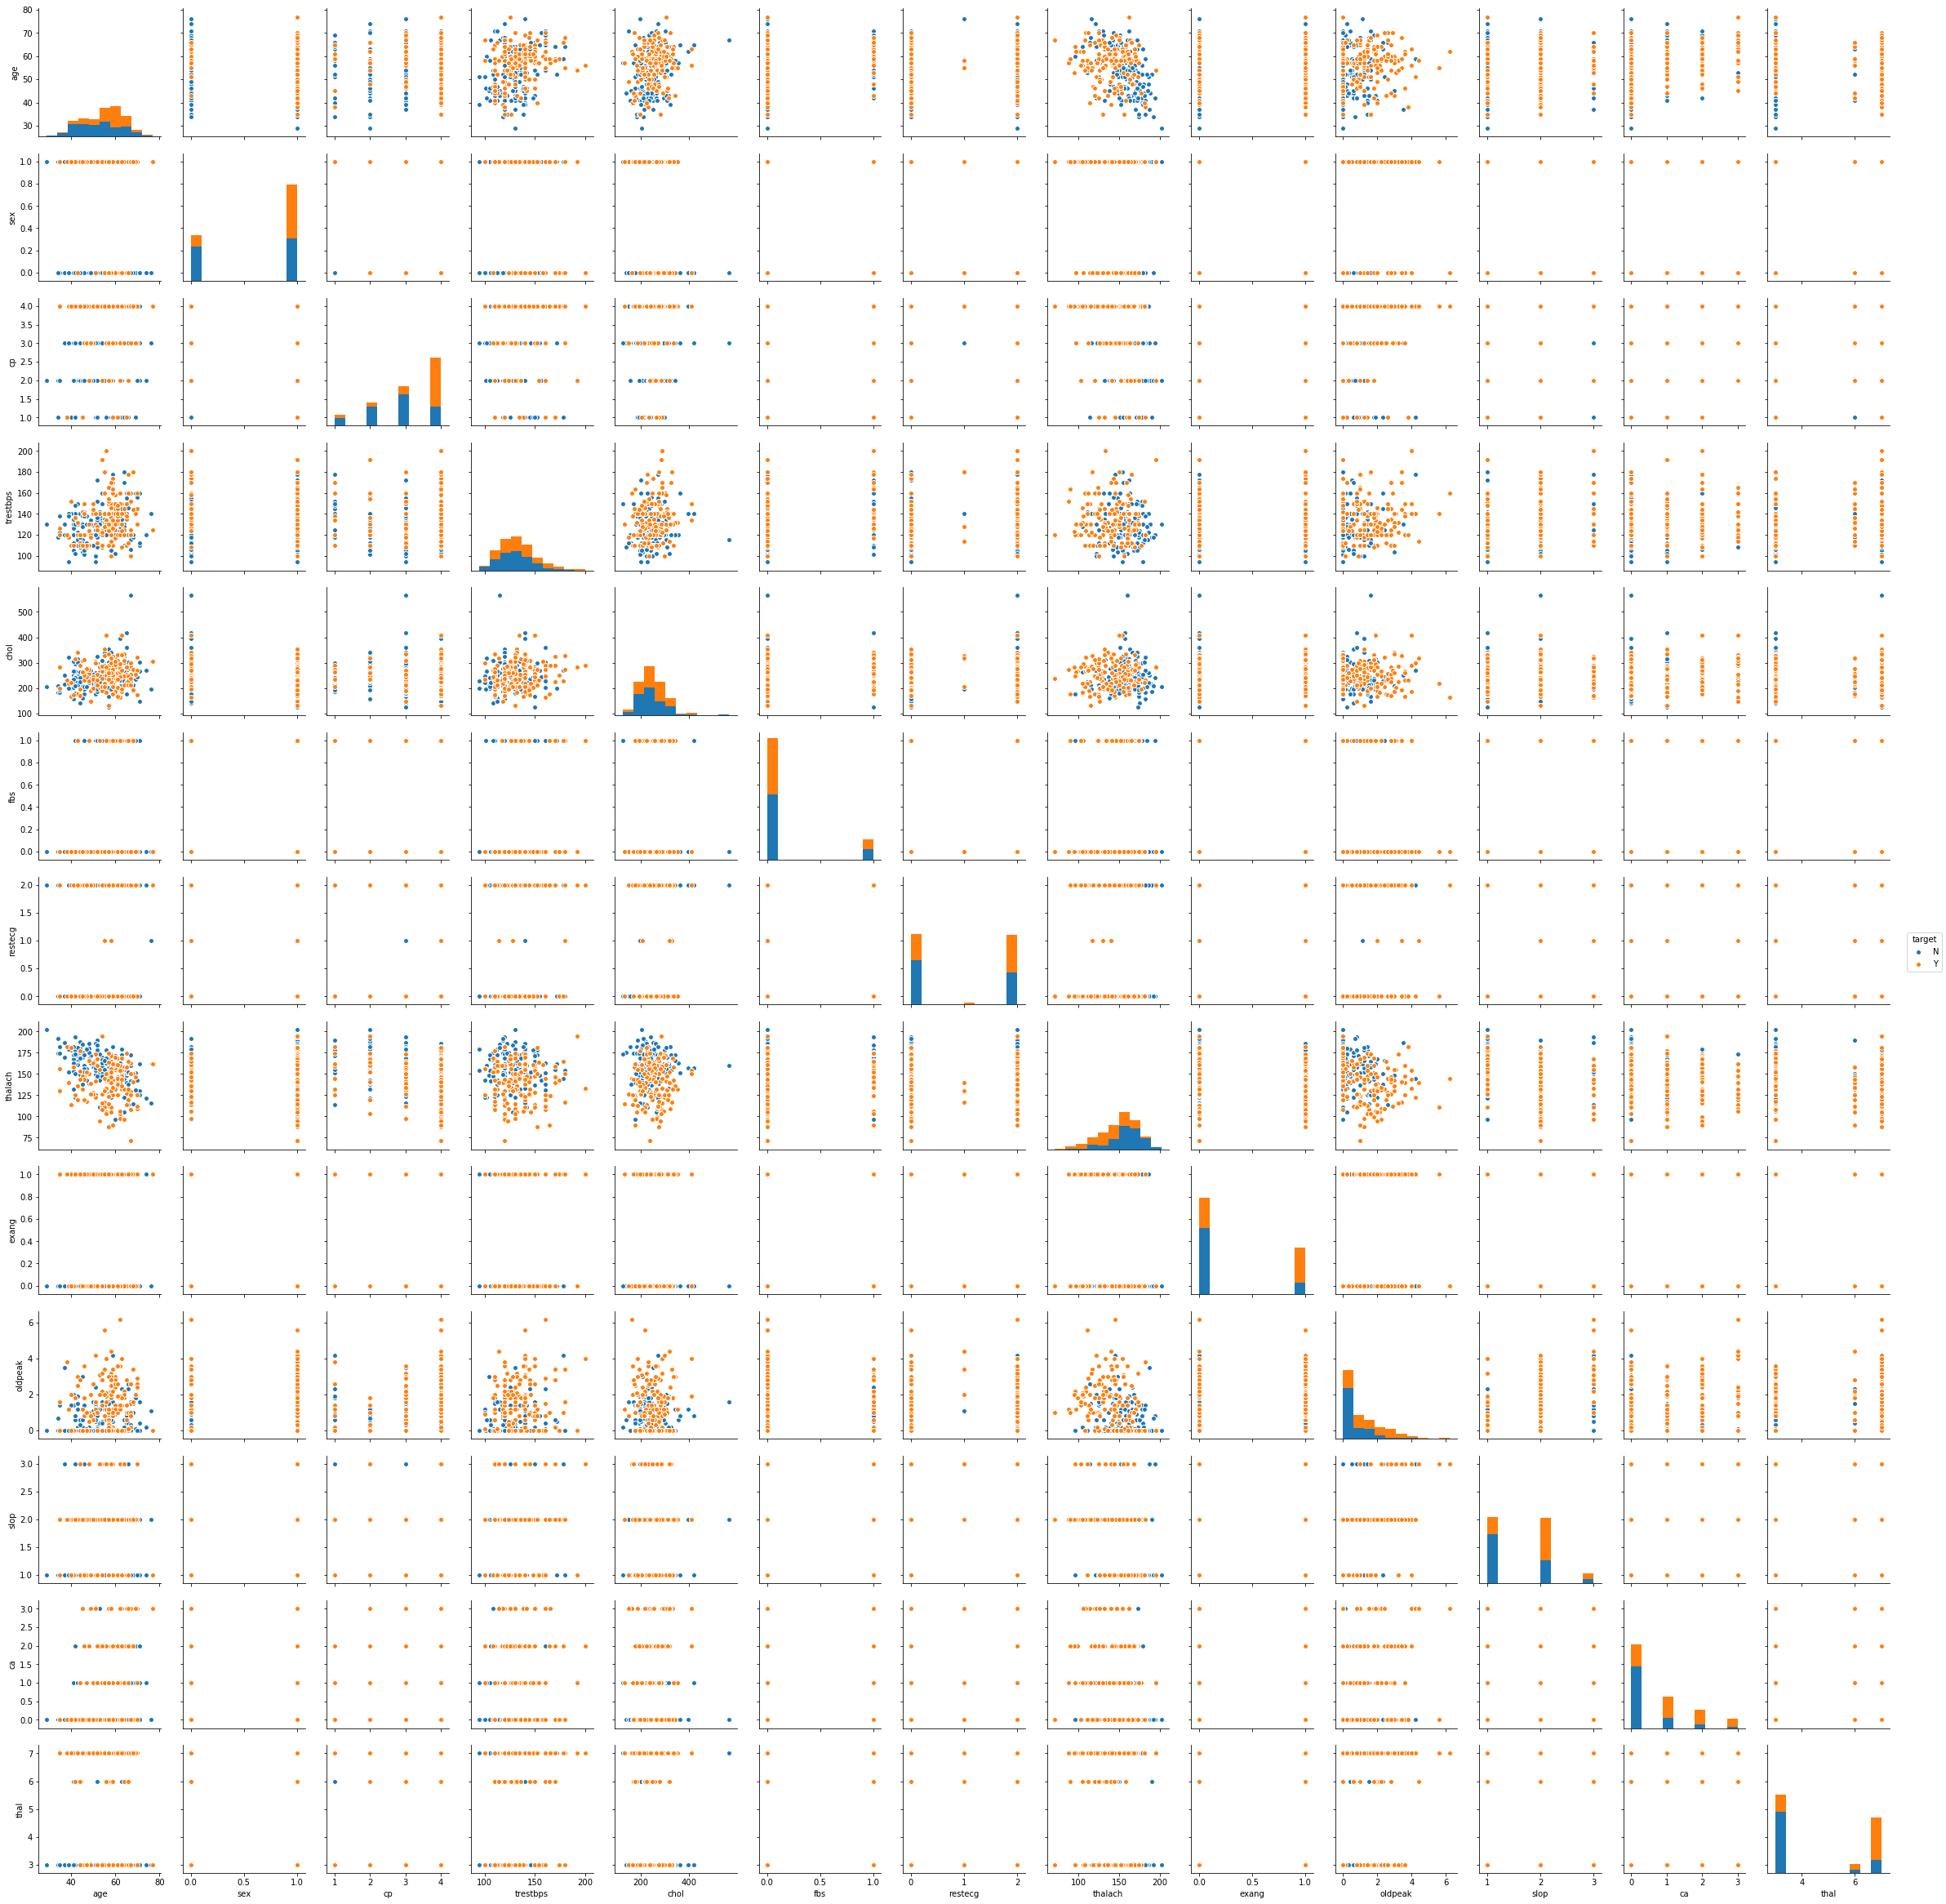

In [6]:
sns.pairplot(data = df, hue='target')

In [8]:
X=df.drop('target',axis =1)
y= df['target']

In [10]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [11]:
y.head()

0    N
1    Y
2    Y
3    N
4    N
Name: target, dtype: object

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
from sklearn.svm import SVC

In [15]:
svc_m = SVC()

In [16]:
svc_m.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
y_pred= svc_m.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix,c

In [20]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[49  0]
 [40  1]]
             precision    recall  f1-score   support

          N       0.55      1.00      0.71        49
          Y       1.00      0.02      0.05        41

avg / total       0.76      0.56      0.41        90



In [22]:
from sklearn.grid_search import GridSearchCV

In [23]:
param_grid = {'C':[1.0,10.0,100.0,1000.0],
              'gamma':[0.1,0.01,0.001,0.0001]}

In [24]:
param_grid

{'C': [1.0, 10.0, 100.0, 1000.0], 'gamma': [0.1, 0.01, 0.001, 0.0001]}

In [25]:
grid = GridSearchCV(SVC(), param_grid,verbose=2)

In [26]:
grid

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.1, 0.01, 0.001, 0.0001], 'C': [1.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [27]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] gamma=0.1, C=1.0 ................................................
[CV] ....................................... gamma=0.1, C=1.0 -   0.0s
[CV] gamma=0.1, C=1.0 ................................................
[CV] ....................................... gamma=0.1, C=1.0 -   0.0s
[CV] gamma=0.1, C=1.0 ................................................
[CV] ....................................... gamma=0.1, C=1.0 -   0.0s
[CV] gamma=0.01, C=1.0 ...............................................
[CV] ...................................... gamma=0.01, C=1.0 -   0.0s
[CV] gamma=0.01, C=1.0 ...............................................
[CV] ...................................... gamma=0.01, C=1.0 -   0.0s
[CV] gamma=0.01, C=1.0 ...............................................
[CV] ...................................... gamma=0.01, C=1.0 -   0.0s
[CV] gamma=0.001, C=1.0 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................... gamma=0.01, C=100.0 -   0.0s
[CV] gamma=0.001, C=100.0 ............................................
[CV] ................................... gamma=0.001, C=100.0 -   0.0s
[CV] gamma=0.001, C=100.0 ............................................
[CV] ................................... gamma=0.001, C=100.0 -   0.0s
[CV] gamma=0.001, C=100.0 ............................................
[CV] ................................... gamma=0.001, C=100.0 -   0.0s
[CV] gamma=0.0001, C=100.0 ...........................................
[CV] .................................. gamma=0.0001, C=100.0 -   0.0s
[CV] gamma=0.0001, C=100.0 ...........................................
[CV] .................................. gamma=0.0001, C=100.0 -   0.0s
[CV] gamma=0.0001, C=100.0 ...........................................
[CV] .................................. gamma=0.0001, C=100.0 -   0.0s
[CV] gamma=0.1, C=1000.0 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.1, 0.01, 0.001, 0.0001], 'C': [1.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [29]:
y_pred2 = grid.predict(X_test)

In [30]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[43  6]
 [ 8 33]]
             precision    recall  f1-score   support

          N       0.84      0.88      0.86        49
          Y       0.85      0.80      0.83        41

avg / total       0.84      0.84      0.84        90



In [31]:
grid.best_params_

{'C': 100.0, 'gamma': 0.0001}

In [32]:
grid.best_estimator_

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)